In [13]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

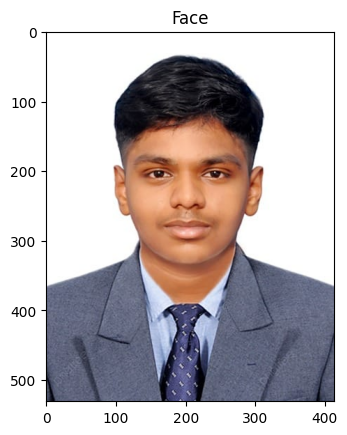

In [14]:
# Load the Face Image
faceImage = cv2.imread('img.jpg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [15]:
faceImage.shape

(531, 413, 3)

Text(0.5, 1.0, 'glassPNG')

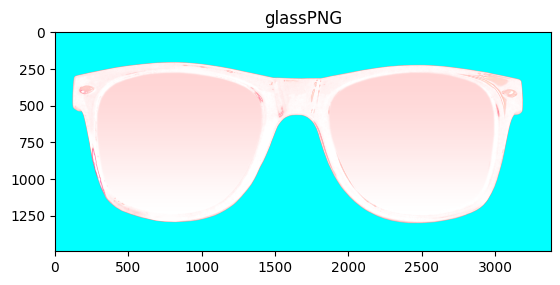

In [16]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassPNG = cv2.imread('glassNew.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

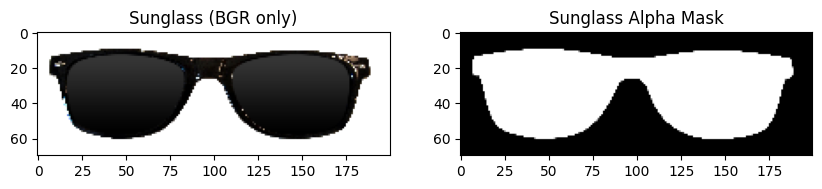

In [17]:
glassPNG = cv2.resize(glassPNG, (200, 70)) 

glassBGR = glassPNG[:, :, 0:3]
glassMask = glassPNG[:, :, 3]

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(glassBGR[:,:,::-1]); plt.title('Sunglass (BGR only)')
plt.subplot(122); plt.imshow(glassMask, cmap='gray'); plt.title('Sunglass Alpha Mask')
plt.show()

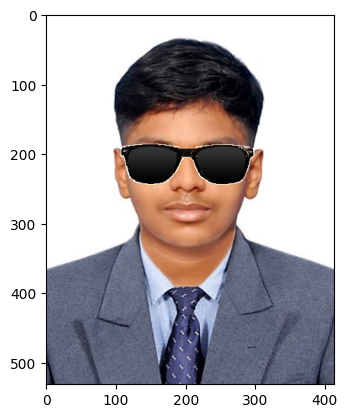

In [32]:
faceWithGlasses = faceImage.copy()

glass_resized = cv2.resize(glassBGR, (210, 80))   # try 220x80 first
mask_resized  = cv2.resize(glassMask, (210, 80))  # resize alpha mask too

h, w, _ = glass_resized.shape

# Choose top-left corner where glasses should sit (adjust manually)
x, y = 100, 175   # move left/right with x, up/down with y

# Region of interest on face
roi = faceWithGlasses[y:y+h, x:x+w]

# Create mask and inverse mask
mask_inv = cv2.bitwise_not(mask_resized)

# Black-out the area of glasses in ROI
roi_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# Take only the glasses from glass image
roi_fg = cv2.bitwise_and(glass_resized, glass_resized, mask=mask_resized)

# Add the glasses to ROI
dst = cv2.add(roi_bg, roi_fg)
faceWithGlasses[y:y+h, x:x+w] = dst

# Show result
plt.imshow(faceWithGlasses[..., ::-1])
plt.show()

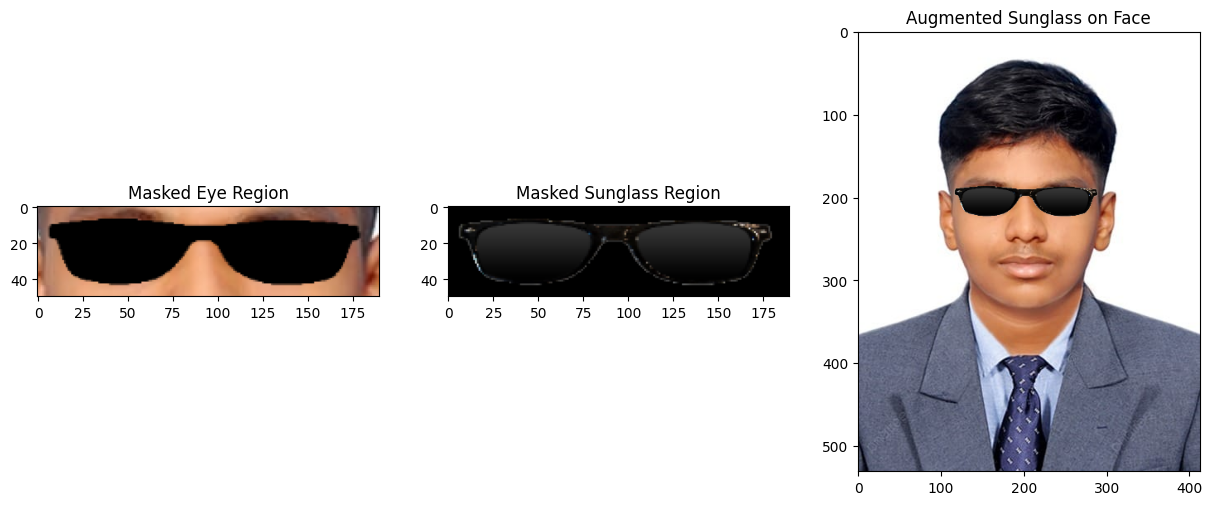

In [33]:
# Copy face image
faceWithGlassesArithmetic = faceImage.copy()

# Resize sunglass and mask to fit the eye region
glass_resized = cv2.resize(glassBGR, (190, 50))      # adjust width/height
mask_resized  = cv2.resize(glassMask, (190, 50))     # same size as glasses

# Ensure mask is 3-channel
glassMask3 = cv2.merge((mask_resized, mask_resized, mask_resized))

# Normalize mask to [0,1]
glassMask3 = glassMask3.astype(np.float32) / 255.0

# Eye ROI (adjust coordinates as per your face)
x, y = 110, 180   # top-left corner
h, w, _ = glass_resized.shape
eyeROI = faceWithGlassesArithmetic[y:y+h, x:x+w].astype(np.float32)

# Masked regions
maskedEye   = cv2.multiply(eyeROI, (1.0 - glassMask3))
maskedGlass = cv2.multiply(glass_resized.astype(np.float32), glassMask3)

# Final blended ROI
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Put back into face
faceWithGlassesArithmetic[y:y+h, x:x+w] = eyeRoiFinal.astype(np.uint8)

# Show results
plt.figure(figsize=[15, 15])
plt.subplot(131); plt.imshow(maskedEye[..., ::-1].astype(np.uint8)); plt.title("Masked Eye Region")
plt.subplot(132); plt.imshow(maskedGlass[..., ::-1].astype(np.uint8)); plt.title("Masked Sunglass Region")
plt.subplot(133); plt.imshow(faceWithGlassesArithmetic[..., ::-1]); plt.title("Augmented Sunglass on Face")
plt.show()

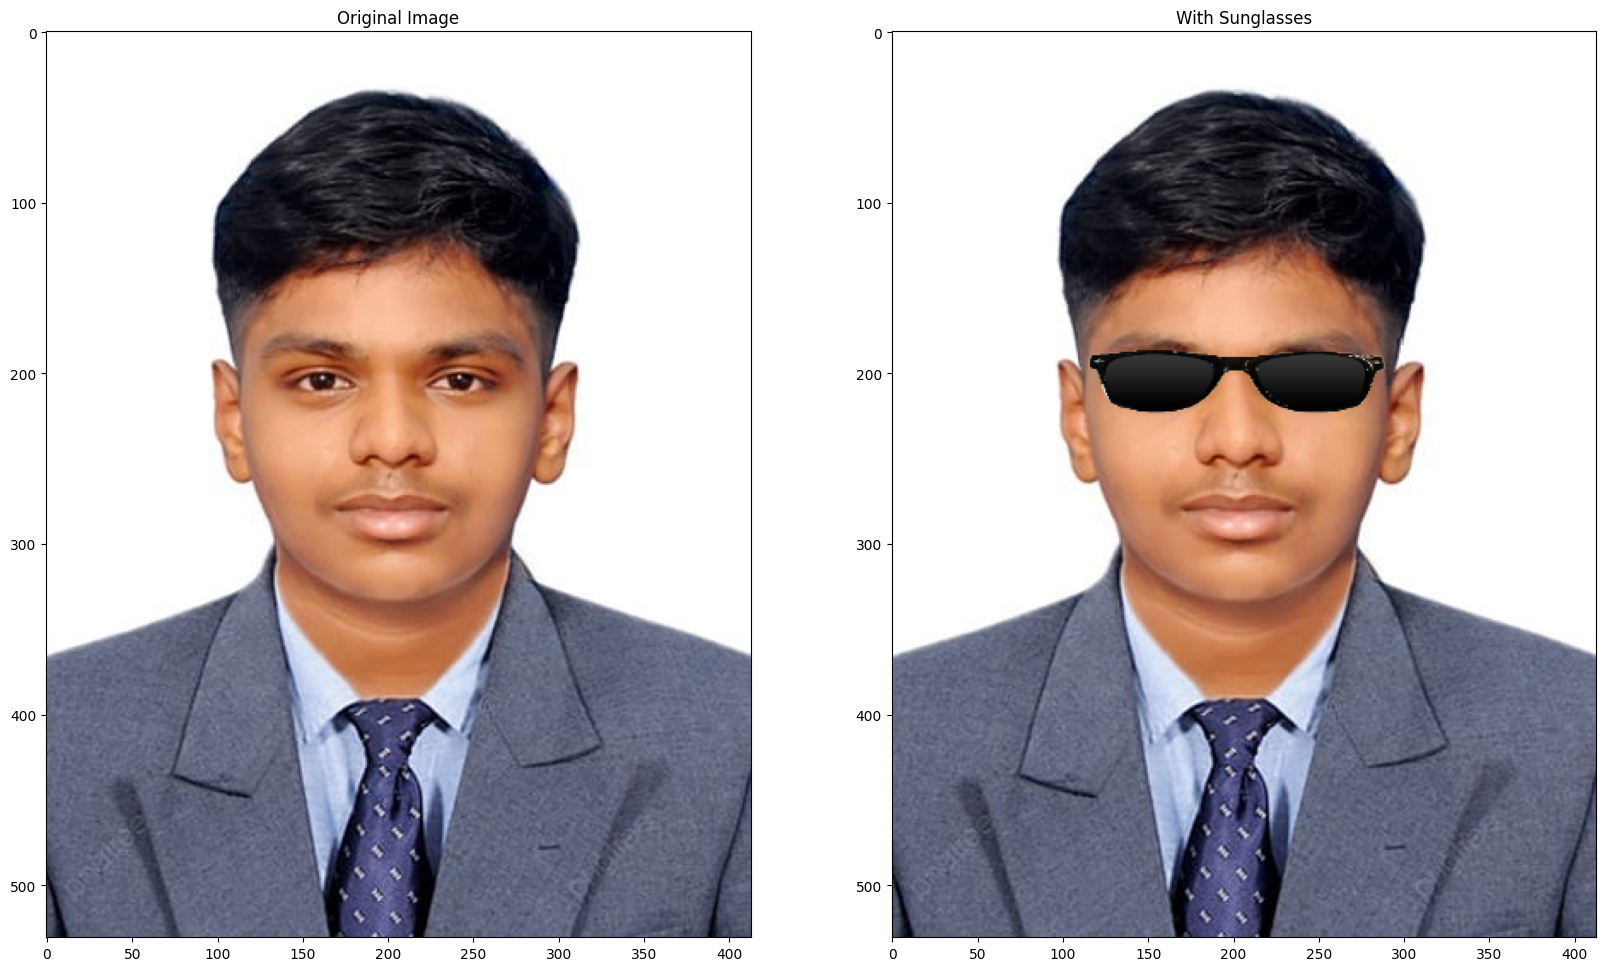

In [34]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[180:230,109:299]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");